In [ ]:

import tensorflow as tf #텐서플로우 2.x 실행

# AUTO ENCODER

## 1-1. AUTO ENCODER란?

오토인코더는 비지도학습 모델입니다.  
특징은 입력층과 출력층이 같다는 것 입니다.  

![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Autoencoder_sparso.png/220px-Autoencoder_sparso.png)  

오토인코더의 주 목적은 데이터의 차원 축소, 노이즈 제거,특성 찾기 등 사용됩니다.



### 1-1-1AUTO ENCODER 간단한 실습

In [ ]:
# binary_crossentropy: 두가지 중에 하나

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

오토인코더는 비지도학습이므로 y의 값을 받지않고 진행합니다.

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() # 비지도학습

11493376/11490434 [==============================] - 0s 0us/step


데이터를 정규화 하여 학습에 알맞은 형태로 바꿉니다.

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Hidden_input은 아래 그림에서 중간 노란색 노드의 개수를 의미합니다.   
즉, Encoding 단계에서 이미지를 얼마만큼 압축할 것인지를 의미합니다.  

In [ ]:
Hidden_input = 100 #압축 크기

오토인코더의 구조는 간단합니다.  
입력층 --> 히든층 --> 출력층 으로 이루어져 있습니다.  

선언하는 Model은 원래는 한개지만 압축 후에는 어떤 형태를 이루는지 보기위해서 인코더 모델을 하나 더 만들어보겠습니다.

In [ ]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train.shape, x_test.shape


((60000, 784), (10000, 784))

In [ ]:
input_layers = layers.Input(shape=(784,))
Encoding = layers.Dense(Hidden_input)(input_layers)
Decoding = layers.Dense(784, activation='sigmoid')(Encoding)

encoding_model = tf.keras.Model(input_layers, Encoding)
autoencoder = tf.keras.Model(input_layers, Decoding)

In [ ]:
autoencoder.compile(
    optimizer='adam',
    loss=tf.keras.losses.binary_crossentropy
)
autoencoder.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0737 - val_loss: 0.0700
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0697 - val_loss: 0.0686
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - val_loss: 0.0678
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - val_loss: 0.0675
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - val_loss: 0.0674
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - val_loss: 0.0673
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676 - val_loss: 0.0673
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - val_loss: 0.0672
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0674 - val_loss: 0.0671
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.067

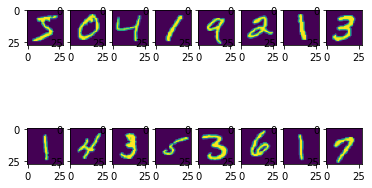

In [ ]:
# original_data
import matplotlib.pyplot as plt
import numpy as np

for i in range(16):
    img = x_train[i].reshape(28, 28)
    plt.subplot(2, 8, i+1)
    plt.imshow(img)

In [ ]:
# Auto encoder 예측된 데이터
predicted_x = autoencoder.predict(x_train)
predicted_x.shape

(60000, 784)

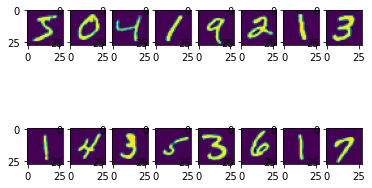

In [ ]:
# 학습된 데이터

for i in range(16):
    img = predicted_x[i].reshape(28, 28)
    plt.subplot(2, 8, i+1)
    plt.imshow(img)

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() # 비지도학습
#오토인코더 모델 구성
input_layer = layers.Input(shape=(784,))  #입력층
Encoding = layers.Dense(Hidden_input)(input_layer) #히든층(이미지를 압축)
Decoding = layers.Dense(784, activation='sigmoid')(Encoding) #출력층(이미지를 원래크기로 복원) 

autoencoder = models.Model(input_layer,Decoding) #오토인코더 모델 선언

#인코더 모델선언
encoder = models.Model(input_layer, Encoding) 

모델을 Compile 시킵니다.  
sigmoid를 사용했으니 Binary_crossentropy를 사용합니다.

--> 이진데이터이기 때문 0 or 1

In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

해당 코드가 이미지를 압축했다가 재구성을 하므로 입력과 출력은 x_train을 넣고 진행합니다.  

In [ ]:
autoencoder.fit(x_train, x_train, epochs=5, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1233 - acc: 0.0135 - val_loss: 0.0789 - val_acc: 0.0122
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0744 - acc: 0.0130 - val_loss: 0.0707 - val_acc: 0.0147
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0701 - acc: 0.0133 - val_loss: 0.0686 - val_acc: 0.0141
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0687 - acc: 0.0137 - val_loss: 0.0679 - val_acc: 0.0139
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0681 - acc: 0.0137 - val_loss: 0.0677 - val_acc: 0.0139


이번에는 학습이 잘 되었는지를 확인하기 위해 Predict를 하겠습니다.  
encoder에 x_test를 넣어 압축된 이미지를 생성합니다.  

In [ ]:
predict_encoded_img = encoding_model.predict(x_test)

원래 이미지를 50개 정도 출력을 해보겠습니다.

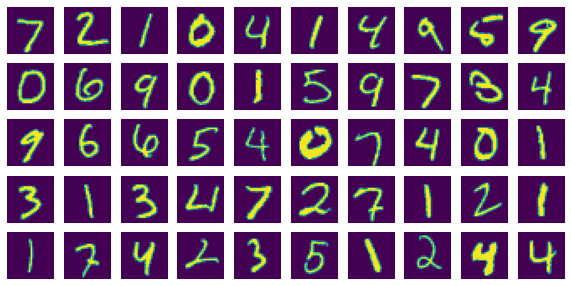

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.axis('off')
plt.show()

이번에는 압축 후 원복 시킨 이미지를 출력시켜보겠습니다.  

In [ ]:
predict_encoded_img[0].shape

(100,)

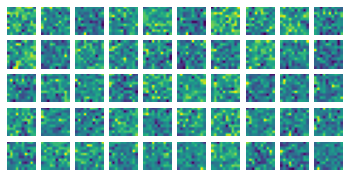

In [ ]:
plt.figure(figsize=(6,3))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_encoded_img[i].reshape(10,10))
  plt.axis('off')
plt.show()

이번에는 autoencoder 모델로 예측을 해보겠습니다.

In [ ]:
predict_autoencoded_img = autoencoder.predict(x_test)

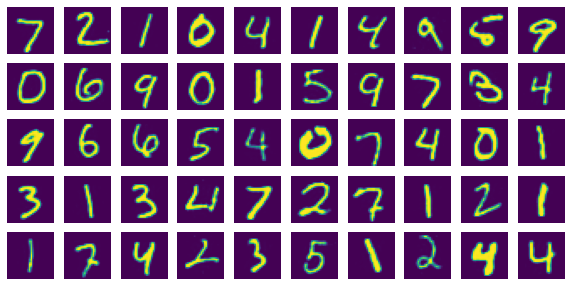

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

원래 데이터와 압축후에 나온 데이터를 비교했을 때 흐릿한 것을 알 수가 있습니다.  

### 1-1-2 Deep AUTO ENCODER 실습

이번에는 싱글로 구성된 오토인코더 아닌 여러층으로 깊이 쌓은 오토인코더를 만들어보겠습니다.   
(x_train, x_test 부분까지는 위에 코드를 그대로 사용하므로, 생략하겠습니다.)

이번에는 여러층을 쌓기 위해서 hidden_input을 다양하게 설정하겠습니다. 

In [ ]:
Hidden_input1 = 500 
Hidden_input2 = 400
Hidden_input3 = 300
Hidden_input4 = 200
Hidden_input5 = 100

In [ ]:
#오토인코더 모델 구성
input_layer = layers.Input(shape=(784,))  #입력층
Encoding = layers.Dense(Hidden_input1)(input_layer) #히든층(이미지를 압축)
Encoding = layers.Dense(Hidden_input2)(Encoding)
Encoding = layers.Dense(Hidden_input3)(Encoding)
Encoding = layers.Dense(Hidden_input4)(Encoding)
Encoding = layers.Dense(Hidden_input5)(Encoding)

Decoding = layers.Dense(Hidden_input4)(Encoding)
Decoding = layers.Dense(Hidden_input3)(Decoding)
Decoding = layers.Dense(Hidden_input2)(Decoding)
Decoding = layers.Dense(Hidden_input1)(Decoding)
Decoding = layers.Dense(784, activation='sigmoid')(Decoding) # 출력층(이미지를 원래크기로 원복)

autoencoder = models.Model(input_layer,Decoding) #오토인코더 모델 선언

In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
autoencoder.fit(x_train, x_train, epochs=5, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1011 - acc: 0.0132 - val_loss: 0.0842 - val_acc: 0.0166
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0831 - acc: 0.0143 - val_loss: 0.0826 - val_acc: 0.0131
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0805 - acc: 0.0144 - val_loss: 0.0781 - val_acc: 0.0170
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0788 - acc: 0.0151 - val_loss: 0.0779 - val_acc: 0.0151
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0773 - acc: 0.0154 - val_loss: 0.0759 - val_acc: 0.0157


In [ ]:
predict_autoencoded_img = autoencoder.predict(x_test)

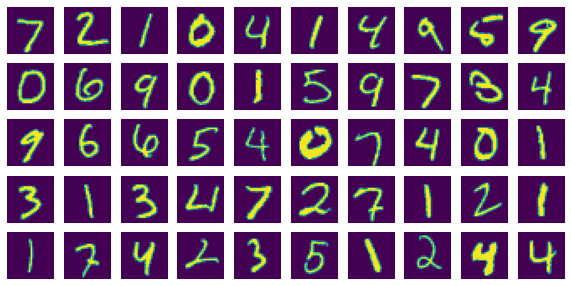

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.axis('off')
plt.show()

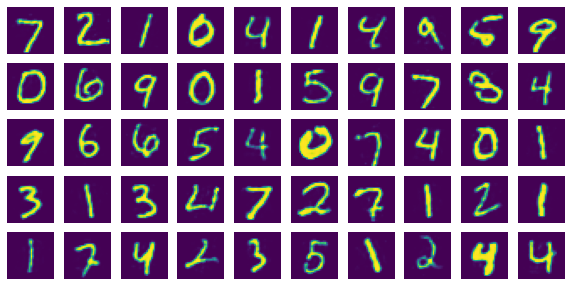

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

### 1-1-3 Convolutional AUTO ENCODER 실습

In [ ]:
(x_train, _),(x_test, _) = datasets.mnist.load_data()

3차원 벡터를 요구하기 때문에 reshape 모양이 변하게 됩니다.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

활성함수를 relu로 설정하였고, 필터사이즈가 영향을 가지 않게 padding을 설정하였습니다.  

In [ ]:
input_layer = layers.Input(shape=(28,28,1)) 
Encoding = layers.Conv2D(64,(2,2),strides=(2,2), padding='same',activation='relu')(input_layer)
Encoding = layers.Conv2D(32,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)

Decoding = layers.Conv2DTranspose(32,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)
Decoding = layers.Conv2DTranspose(1,(2,2),strides=(2,2), padding='same',activation='sigmoid')(Decoding)
autoencoder = models.Model(input_layer,Decoding)

모델을 확인 했을 때 이미지가 원래 크기로 돌아온 것을 확인할 수 있습니다.

4128

In [ ]:
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          8224      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        4128      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         129       
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

학습 시간이 오래 걸리기 때문에 에폭은 10정도로 세팅하겠습니다.

In [ ]:
autoencoder.fit(x_train,x_train,epochs=10,shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0859 - val_loss: 0.0621
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0618 - val_loss: 0.0610
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0610 - val_loss: 0.0605
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0606 - val_loss: 0.0601
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0603 - val_loss: 0.0598
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0600 - val_loss: 0.0596
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0597 - val_loss: 0.0593
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0594 - val_loss: 0.0591
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0593 - val_loss: 0.0589
Epoch 10/10
1875/1875 [==============================] - 18s 10m

예측을 하여 원래 데이터셋과 비교를 해보겠습니다.

In [ ]:
predict_autoencoded_img = autoencoder.predict(x_test)

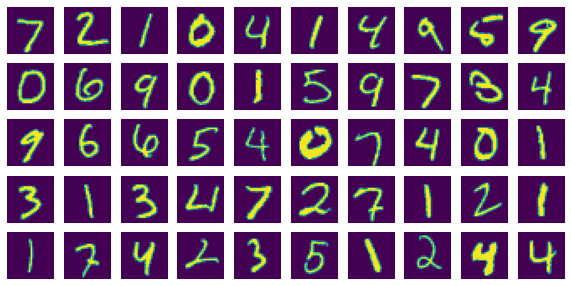

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.axis('off')
plt.show()

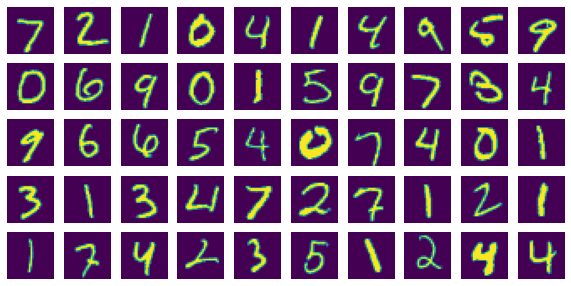

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

CNN 모델을 사용한 AUTO ENCODER를 확인 했을 때 노이즈가 별로 없으며 원래 이미지와 별 차이가 없는 모습을 보입니다. 

### 1-1-4 Denoising AUTO ENCODER 

노이즈가 있는 이미지를 AUTO ENCODER를 이용하여 원복 시키겠습니다.  
이번에는 Convolution AUTO ENCODER 코드를 가져와서 사용해보겠습니다.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0

In [ ]:
np.random.normal(0.0, 1.0, 5)

array([ 1.99382692, -1.66957145,  0.44597154, -0.30985571,  0.00428904])

mnist 데이터를 쓰는 게 아닌 노이즈를 섞어 사용 할 것입니다.  
코드를 하기 전 numpy의 함수 2개를 간단하게 배워보겠습니다.  


np.random.normal(loc,scale,size)은 loc,sacle,size로 구성되어 있습니다.  
loc -> 분포의 평균을 의미하고   
scale -> 분포의 표준편차를 나타냅니다  
size -> 행렬의 크기를 입력을 하거나 크기로도 입력이 가능합니다.
또한 생략이 가능합니다. 



np.clip(a,a_min,a_max)은 a, a_min,a_max로 구성되어 있습니다.    
a -> 클립할 배열의 나타냅니다.  
a_min -> 클립할 최소의 값을 나타내고 해당 값보다 미만일 때는 해당 값으로 치환   
a_max -> 클립할 최대의 값을 나타내고 해당 값보다 초과일 때는 해당 값으로 치환

0 ~ 1의 사이의 값중 트레인셋과 테스트셋에 맞춰서 노이즈를 생성합니다.  
각 데이터셋에다가 노이즈를 더하고 clip을 하게 됩니다.  

0.4를 곱한 이유는 노이즈를 약하게 주기 위해서 입니다.  
해당 값은 임의 값으로 수정 할수 있습니다

In [ ]:
train_create_noisy = np.random.normal(0.0, 1.0, x_train.shape)
test_create_noisy = np.random.normal(0.0, 1.0, x_test.shape)
train_noisy = np.clip(x_train+train_create_noisy*0.4, 
                      0., 
                      1.)
test_noisy = np.clip(x_test+test_create_noisy*0.4, 
                     0., 
                     1.)

노이즈가 적용된 트레인 데이터셋과 원래의 데이터 셋을 살펴 보겠습니다.  

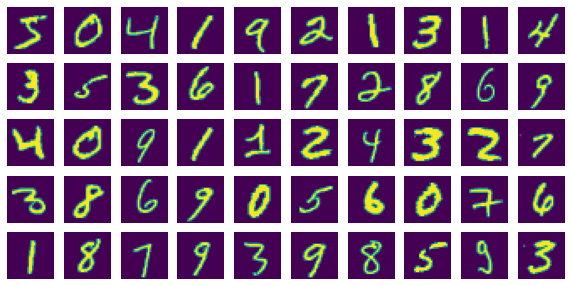

In [ ]:
#원본
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i].reshape(28,28))
  plt.axis('off')
plt.show()

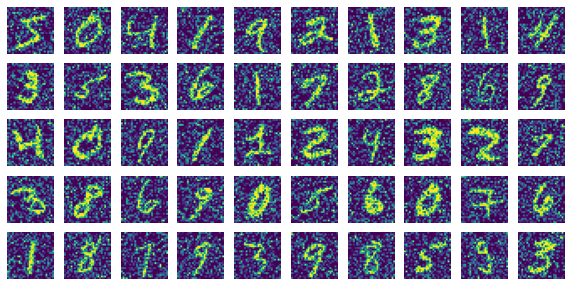

In [ ]:
# 노이즈 존재
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(train_noisy[i].reshape(28,28))
  plt.axis('off')
plt.show()

노이즈가 적용되서 원래의 이미지보다 알아보기가 힘든 점을 볼수 가 있습니다.  
아까 1-1-3 실습을 할 때 만들었던 코드를 수정없이 진행을 해보겠습니다.

In [ ]:
class Dense(object):
    def __call__(self, layer):
        self.call(layer)
    def call(self, layer):
        pass

In [ ]:
# model = keras.Sequential([
#                           ....
# ])
# ---
# 
# input_layer = layers.input(shape=(28,28,1))
# layer1 = layers.Dense(128)(input_layer)
# layer1

In [ ]:
input_layer = layers.Input(shape=(28,28,1)) 
Encoding = layers.Conv2D(64,(2,2),strides=(2,2), padding='same',activation='relu')(input_layer)
Encoding = layers.Conv2D(32,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)

Decoding = layers.Conv2DTranspose(32,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)
Decoding = layers.Conv2DTranspose(1,(2,2),strides=(2,2), padding='same',activation='sigmoid')(Decoding)
autoencoder = models.Model(input_layer,Decoding)

In [ ]:
input_layer = layers.Input(shape=(28,28,1)) 
Encoding = layers.Conv2D(64,(2,2),strides=(2,2), padding='same',activation='relu')(input_layer)
# Encoding = layers.MaxPooling2D((2, 2), padding='same')(Encoding)
Encoding = layers.Conv2D(32,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)

Decoding = layers.Conv2DTranspose(32,(2,2),strides=(2,2), padding='same',activation='relu')(Encoding)
# Decoding = layers.UpSampling2D((2,2))(Decoding)
Decoding = layers.Conv2DTranspose(1,(2,2),strides=(2,2), padding='same',activation='sigmoid')(Decoding)
autoencoder = models.Model(input_layer, Decoding)

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

이번에는 결과값에다가는 노이즈가 적용이 안된 데이터셋을 넣어줍니다.  
그래야 노이즈를 제거하고 데이터를 원복 시킬 수 있습니다.  

In [ ]:
autoencoder.fit(train_noisy, x_train, epochs=5, shuffle=True, validation_data=(test_noisy,x_test))

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1470 - val_loss: 0.1198
Epoch 2/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1196 - val_loss: 0.1186
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1186 - val_loss: 0.1180
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1183 - val_loss: 0.1174
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1180 - val_loss: 0.1173


노이즈 테스트 데이터 셋을 넣어 예측이 잘되는지 살펴보겠습니다.  

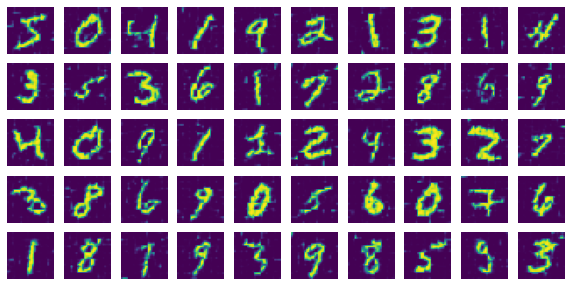

In [ ]:
predict_autoencoded_img = autoencoder.predict(train_noisy)
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

In [ ]:
predict_autoencoded_img = autoencoder.predict(test_noisy)

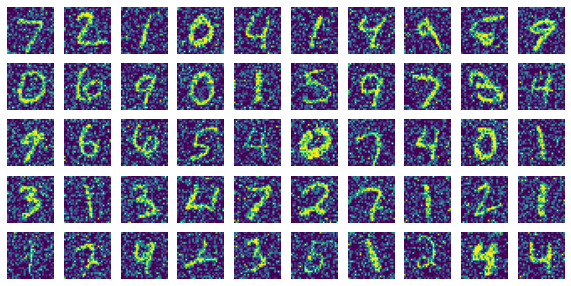

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(test_noisy[i].reshape(28,28))
  plt.axis('off')
plt.show()

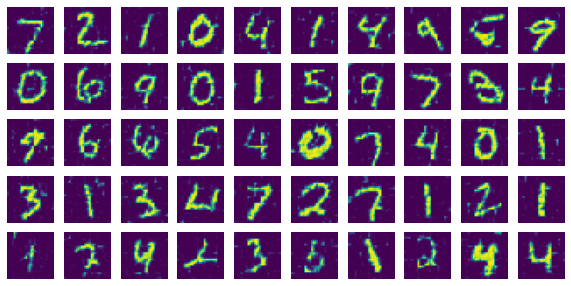

In [ ]:
plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

확인 결과 노이즈가 제거된 이미지를 확인 할 수 있습니다.

### 1-1-5 AUTO ENCODER 문제

코드를 작성하고 돌려보니 수정 해야할 부분이 여러 군데가 있습니다.    
1. 현재 압축 크기가 설정되어 있지 않아서 임의의 숫자로 설정을 해야하고,
2. 활성함수를 sigmoid로 수정을 해야합니다.  

3. 또한 sigmoid로 바뀌면서 loss도 수정을 해야합니다.  

In [ ]:
tf.keras.losses.binary_crossentropy

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#### 문제 1 ####
Hidden_input = 
################

input_layer = layers.Input(shape=(784,))  
Encoding = layers.Dense(Hidden_input)(input_layer) 
#### 문제 2 ####
Decoding = layers.Dense(784, activation='relu')(Encoding)
################

autoencoder = models.Model(input_layer,Decoding) 

encoder = models.Model(input_layer,Encoding) 

encoded_input = layers.Input(shape=(Hidden_input,)) 

decoder_layer = autoencoder.layers[2]

decoder = models.Model(encoded_input,decoder_layer(encoded_input))
#### 문제 3 ####
autoencoder.compile(optimizer='adam',loss='mse',metrics=['acc'])
################

autoencoder.fit(x_train,x_train,epochs=50,shuffle=True,validation_data=(x_test,x_test))

plt.figure(figsize=(10,3))
for i in range50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_decoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

#### ANWSER

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#### 문제 1 ####
Hidden_input = 100
################

input_layer = layers.Input(shape=(784,))  
Encoding = layers.Dense(Hidden_input)(input_layer) 
#### 문제 2 ####
Decoding = layers.Dense(784, activation='sigmoid')(Encoding)
################

autoencoder = models.Model(input_layer,Decoding) 
encoder = models.Model(input_layer, Encoding) 

encoded_input = layers.Input(shape=(Hidden_input,)) 

decoder_layer = autoencoder.layers[2]

decoder = models.Model(encoded_input,decoder_layer(encoded_input))
#### 문제 3 ####
autoencoder.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
################

autoencoder.fit(x_train, x_train ,epochs=50, shuffle=True, validation_data=(x_test,x_test))

plt.figure(figsize=(10,3))
for i in range50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_decoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

### 1-1-6 AUTO ENCODER 문제2 

Deep AUTO ENCODER를 작성하다가 코드의 일부분이 지워지는 안타까운 상황이 발생하였습니다.  
지워진 코드의 일부분을 채워보자

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() # 비지도학습

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

Hidden_input1 = 512 
Hidden_input2 = 256
Hidden_input3 = 128
Hidden_input4 = 64
Hidden_input5 = 32

#### 문제 1 ####
input_layer =  #input layer 만들기
################
Encoding = layers.Dense(Hidden_input1)(input_layer)
Encoding = layers.Dense(Hidden_input2)(Encoding)
Encoding = layers.Dense(Hidden_input3)(Encoding)
Encoding = layers.Dense(Hidden_input4)(Encoding)
Encoding = layers.Dense(Hidden_input5)(Encoding)
Decoding = layers.Dense(Hidden_input4)(Encoding)
Decoding = layers.Dense(Hidden_input3)(Decoding)
Decoding = layers.Dense(Hidden_input2)(Decoding)
Decoding = layers.Dense(Hidden_input1)(Decoding)
Decoding = layers.Dense(784, activation='sigmoid')(Decoding) 

#### 문제 2 #####
autoencoder = #오토인코더의 모델을 완성하기
#################

#### 문제 3 #####
autoencoder # 모델 컴파일 시키기
#################

autoencoder.fit(x_train,x_train,epochs=50,shuffle=True,validation_data=(x_test,x_test))

#### 문제 4 ####
predict_autoencoded_img = autoencoder # test값으로 예측이미지 생성
################

plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

#### 정답

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() # 비지도학습

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

Hidden_input1 = 512 
Hidden_input2 = 256
Hidden_input3 = 128
Hidden_input4 = 64
Hidden_input5 = 32

#### 문제 1 ####
input_layer =  #input layer 만들기
################
Encoding = layers.Dense(Hidden_input1)(input_layer)
Encoding = layers.Dense(Hidden_input2)(Encoding)
Encoding = layers.Dense(Hidden_input3)(Encoding)
Encoding = layers.Dense(Hidden_input4)(Encoding)
Encoding = layers.Dense(Hidden_input5)(Encoding)
Decoding = layers.Dense(Hidden_input4)(Encoding)
Decoding = layers.Dense(Hidden_input3)(Decoding)
Decoding = layers.Dense(Hidden_input2)(Decoding)
Decoding = layers.Dense(Hidden_input1)(Decoding)
Decoding = layers.Dense(784, activation='sigmoid')(Decoding) 

#### 문제 2 #####
autoencoder = #오토인코더의 모델을 완성하기
#################

#### 문제 3 #####
autoencoder # 모델 컴파일 시키기
#################

autoencoder.fit(x_train,x_train,epochs=50,shuffle=True,validation_data=(x_test,x_test))

#### 문제 4 ####
predict_autoencoded_img = autoencoder # test값으로 예측이미지 생성
################

plt.figure(figsize=(10,5))
for i in range(50) : 
  plt.subplot(5,10,i+1)
  plt.imshow(predict_autoencoded_img[i].reshape(28,28))
  plt.axis('off')
plt.show()

### 1-1-7 AUTO ENCODER 문제 3

오토인코더에다가 CNN을 합한 모델이 있다고 하였고, 인터넷 검색을 하여도 코드를 찾을 수 없어 직접 구현하기로 마음을 먹었습니다.    

논문을 읽었을 때 오토인코더의 변경된 점은
1. Conv2D((2,2),strides=(2,2)를 사용하였고,   
2. 두번째 레이어에는(Conv1번 적용 후) MaxPooling을 사용했습니다.     

디코딩 할 때에는 Conv2DTranspose 라는 레이어를 사용하였습니다. 


3. 3층으로 구성된 CNN 이며 adam을 사용하였습니다.

이런 점을 고려했을 때 코드를 작성하여 보세요. 


**MaxPooling과 반대는 UpSampling2D 입니다.**

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() 
x_train, x_test = datasets.mnist..~~

In [ ]:
x_train.shape() #error
len(x_train) # 2

#### 정답


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0924 - val_loss: 0.0742
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0690 - val_loss: 0.0659
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0666 - val_loss: 0.0651
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0654 - val_loss: 0.0649
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0647 - val_loss: 0.0640
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0641 - val_loss: 0.0646
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0637 - val_loss: 0.0633
Epoch 8/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0633 - val_loss: 0.0621
Epoch 9/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.06

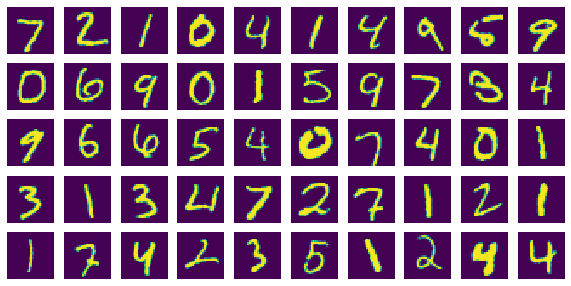

In [ ]:
(x_train,_),(x_test,_) = datasets.mnist.load_data() 

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') /255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# 1. Conv2D((2,2),strides=(2,2)를 사용하였고,   
input_layers = layers.Input(shape=(28, 28,1))

# 28 * 28
Encoding = layers.Conv2D(64, (2, 2), strides=(1, 1), padding='SAME', activation='relu')(input_layers)
# 14 * 14
# 문제 2. 두번째 레이어에는(Conv1번 적용 후) MaxPooling을 사용했습니다.   
Encoding = layers.MaxPooling2D((2,2))(Encoding)
Encoding = layers.Conv2D(32,(2,2), strides=(2,2), padding='same',activation='relu')(Encoding)
Encoding = layers.Conv2D(16,(2,2), strides=(2,2), padding='same',activation='relu')(Encoding)


# 문제 3: 디코딩 할 때에는 Conv2DTranspose 라는 레이어를 사용하였습니다. 
#  7*7
Decoding = layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same', activation='relu')(Encoding)
# 14 * 14
Decoding = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same', activation='relu')(Decoding)
Decoding = layers.UpSampling2D((2,2))(Decoding)
# 출력층
Decoding = layers.Conv2DTranspose(1, (2,2), strides=(1,1), padding='same', activation='sigmoid')(Decoding)


encoder = tf.keras.Model(input_layers, Encoding)
ae = tf.keras.Model(input_layers, Decoding)
# 3. 3층으로 구성된 CNN 이며 adam을 사용하였습니다.
